In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

from sklearn.model_selection import train_test_split
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Custom loss function

In [2]:
# mask for empty value
mask_value = -1
def masked_loss_function(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    return K.categorical_crossentropy(y_true * mask, y_pred * mask)

# This is the same as 'categorical_crossentropy' for comparing 
def another_loss_function(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)

## Generate toy data

In [3]:
N =100000
X = np.random.rand(N,2)
# place holder for Y
Y = np.ones((N,3))

Y[:,0] = X[:, 1] <= 0.5
Y[:,1] = X[:, 0] >= 0.5

# s1 = X[:, 0] < 0.25
# s2 = np.logical_and(X[:, 0] > 0.5, X[:, 0] < 0.75)
# Y[:,2] = np.logical_or(s1, s2)

Y[:,2] = X[:, 0] + X[:, 1] > 1

## Mark some empty values

In [4]:
Y[: int(N*0.020), 0] = mask_value
Y[int(N*0.018): int(N*0.0025), 1] = mask_value
Y[int(N*0.024): int(N*0.0035), 2] = mask_value

In [5]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# Compile model
# masked_loss_function
model.compile(loss=masked_loss_function, optimizer='adam', metrics=['accuracy'])

# split into 90% for train and 10% for dev
X_train, X_dev, y_train, y_dev = train_test_split(X[:-3000], Y[:-3000], test_size=0.9, 
                                                  random_state=seed)

history = model.fit(X_train, y_train, validation_data=(X_dev,y_dev), 
                    epochs=2000, batch_size=5000)

Train on 9700 samples, validate on 87300 samples
Epoch 1/2000
9700/9700 [==============================] - 2s 166us/step - loss: 1.6211 - acc: 0.5325 - val_loss: 1.6306 - val_acc: 0.5446
Epoch 2/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6194 - acc: 0.5486 - val_loss: 1.6288 - val_acc: 0.5411
Epoch 3/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6176 - acc: 0.5425 - val_loss: 1.6269 - val_acc: 0.5540
Epoch 4/2000
9700/9700 [==============================] - 0s 6us/step - loss: 1.6158 - acc: 0.5523 - val_loss: 1.6251 - val_acc: 0.5444
Epoch 5/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6139 - acc: 0.5051 - val_loss: 1.6231 - val_acc: 0.4236
Epoch 6/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6120 - acc: 0.3984 - val_loss: 1.6211 - val_acc: 0.3463
Epoch 7/2000
9700/9700 [==============================] - 0s 6us/step - loss: 1.6099 - acc: 0.3330 - val_loss: 1.6190 - val_acc: 0.30

9700/9700 [==============================] - 0s 6us/step - loss: 1.2151 - acc: 0.5820 - val_loss: 1.2226 - val_acc: 0.5769
Epoch 61/2000
9700/9700 [==============================] - 0s 8us/step - loss: 1.2050 - acc: 0.5830 - val_loss: 1.2129 - val_acc: 0.5781
Epoch 62/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.1953 - acc: 0.5852 - val_loss: 1.2035 - val_acc: 0.5789
Epoch 63/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.1858 - acc: 0.5867 - val_loss: 1.1945 - val_acc: 0.5805
Epoch 64/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.1766 - acc: 0.5877 - val_loss: 1.1859 - val_acc: 0.5819
Epoch 65/2000
9700/9700 [==============================] - 0s 8us/step - loss: 1.1681 - acc: 0.5885 - val_loss: 1.1778 - val_acc: 0.5822
Epoch 66/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.1600 - acc: 0.5889 - val_loss: 1.1703 - val_acc: 0.5822
Epoch 67/2000
9700/9700 [==============================

Epoch 120/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9906 - acc: 0.6028 - val_loss: 1.0068 - val_acc: 0.5988
Epoch 121/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9893 - acc: 0.6022 - val_loss: 1.0055 - val_acc: 0.5980
Epoch 122/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9880 - acc: 0.6022 - val_loss: 1.0043 - val_acc: 0.5998
Epoch 123/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9868 - acc: 0.6031 - val_loss: 1.0030 - val_acc: 0.5995
Epoch 124/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9856 - acc: 0.6030 - val_loss: 1.0019 - val_acc: 0.5998
Epoch 125/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9844 - acc: 0.6033 - val_loss: 1.0007 - val_acc: 0.5984
Epoch 126/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9833 - acc: 0.6028 - val_loss: 0.9996 - val_acc: 0.5992
Epoch 127/2000
9700/9700 [========

9700/9700 [==============================] - 0s 6us/step - loss: 0.9525 - acc: 0.6085 - val_loss: 0.9691 - val_acc: 0.6067
Epoch 180/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9523 - acc: 0.6094 - val_loss: 0.9688 - val_acc: 0.6057
Epoch 181/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9520 - acc: 0.6081 - val_loss: 0.9686 - val_acc: 0.6048
Epoch 182/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9517 - acc: 0.6078 - val_loss: 0.9683 - val_acc: 0.6050
Epoch 183/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9514 - acc: 0.6084 - val_loss: 0.9679 - val_acc: 0.6065
Epoch 184/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9511 - acc: 0.6098 - val_loss: 0.9676 - val_acc: 0.6078
Epoch 185/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9509 - acc: 0.6109 - val_loss: 0.9674 - val_acc: 0.6064
Epoch 186/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9405 - acc: 0.6153 - val_loss: 0.9570 - val_acc: 0.6134
Epoch 239/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9404 - acc: 0.6160 - val_loss: 0.9568 - val_acc: 0.6141
Epoch 240/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9403 - acc: 0.6165 - val_loss: 0.9567 - val_acc: 0.6143
Epoch 241/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9401 - acc: 0.6167 - val_loss: 0.9566 - val_acc: 0.6144
Epoch 242/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9400 - acc: 0.6167 - val_loss: 0.9564 - val_acc: 0.6143
Epoch 243/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9399 - acc: 0.6158 - val_loss: 0.9564 - val_acc: 0.6127
Epoch 244/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9397 - acc: 0.6159 - val_loss: 0.9561 - val_acc: 0.6158
Epoch 245/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9341 - acc: 0.6449 - val_loss: 0.9506 - val_acc: 0.6432
Epoch 298/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9341 - acc: 0.6452 - val_loss: 0.9505 - val_acc: 0.6438
Epoch 299/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9340 - acc: 0.6459 - val_loss: 0.9504 - val_acc: 0.6451
Epoch 300/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9339 - acc: 0.6481 - val_loss: 0.9503 - val_acc: 0.6476
Epoch 301/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9338 - acc: 0.6489 - val_loss: 0.9502 - val_acc: 0.6471
Epoch 302/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9337 - acc: 0.6489 - val_loss: 0.9502 - val_acc: 0.6475
Epoch 303/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9337 - acc: 0.6496 - val_loss: 0.9501 - val_acc: 0.6486
Epoch 304/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9301 - acc: 0.6893 - val_loss: 0.9466 - val_acc: 0.6867
Epoch 357/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9301 - acc: 0.6905 - val_loss: 0.9465 - val_acc: 0.6884
Epoch 358/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9300 - acc: 0.6912 - val_loss: 0.9465 - val_acc: 0.6884
Epoch 359/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9300 - acc: 0.6913 - val_loss: 0.9464 - val_acc: 0.6881
Epoch 360/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9299 - acc: 0.6913 - val_loss: 0.9464 - val_acc: 0.6890
Epoch 361/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9299 - acc: 0.6923 - val_loss: 0.9463 - val_acc: 0.6895
Epoch 362/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9298 - acc: 0.6924 - val_loss: 0.9463 - val_acc: 0.6904
Epoch 363/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9274 - acc: 0.7153 - val_loss: 0.9438 - val_acc: 0.7147
Epoch 416/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9274 - acc: 0.7154 - val_loss: 0.9438 - val_acc: 0.7156
Epoch 417/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9274 - acc: 0.7167 - val_loss: 0.9438 - val_acc: 0.7156
Epoch 418/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9273 - acc: 0.7157 - val_loss: 0.9438 - val_acc: 0.7151
Epoch 419/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9273 - acc: 0.7159 - val_loss: 0.9437 - val_acc: 0.7161
Epoch 420/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9272 - acc: 0.7165 - val_loss: 0.9436 - val_acc: 0.7183
Epoch 421/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9272 - acc: 0.7180 - val_loss: 0.9436 - val_acc: 0.7177
Epoch 422/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9256 - acc: 0.7387 - val_loss: 0.9418 - val_acc: 0.7403
Epoch 475/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9254 - acc: 0.7400 - val_loss: 0.9418 - val_acc: 0.7390
Epoch 476/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9254 - acc: 0.7397 - val_loss: 0.9418 - val_acc: 0.7391
Epoch 477/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9254 - acc: 0.7395 - val_loss: 0.9418 - val_acc: 0.7400
Epoch 478/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9253 - acc: 0.7413 - val_loss: 0.9417 - val_acc: 0.7417
Epoch 479/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9253 - acc: 0.7423 - val_loss: 0.9417 - val_acc: 0.7411
Epoch 480/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9253 - acc: 0.7416 - val_loss: 0.9417 - val_acc: 0.7408
Epoch 481/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.9240 - acc: 0.7608 - val_loss: 0.9404 - val_acc: 0.7573
Epoch 534/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9239 - acc: 0.7611 - val_loss: 0.9403 - val_acc: 0.7581
Epoch 535/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9239 - acc: 0.7616 - val_loss: 0.9403 - val_acc: 0.7586
Epoch 536/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9239 - acc: 0.7624 - val_loss: 0.9402 - val_acc: 0.7593
Epoch 537/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9239 - acc: 0.7630 - val_loss: 0.9403 - val_acc: 0.7586
Epoch 538/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9239 - acc: 0.7619 - val_loss: 0.9403 - val_acc: 0.7581
Epoch 539/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9238 - acc: 0.7624 - val_loss: 0.9402 - val_acc: 0.7603
Epoch 540/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.9228 - acc: 0.7731 - val_loss: 0.9391 - val_acc: 0.7744
Epoch 593/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9228 - acc: 0.7741 - val_loss: 0.9391 - val_acc: 0.7749
Epoch 594/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9228 - acc: 0.7744 - val_loss: 0.9391 - val_acc: 0.7741
Epoch 595/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9228 - acc: 0.7733 - val_loss: 0.9392 - val_acc: 0.7737
Epoch 596/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.9228 - acc: 0.7739 - val_loss: 0.9391 - val_acc: 0.7753
Epoch 597/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9228 - acc: 0.7746 - val_loss: 0.9391 - val_acc: 0.7755
Epoch 598/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9228 - acc: 0.7754 - val_loss: 0.9390 - val_acc: 0.7764
Epoch 599/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9219 - acc: 0.7874 - val_loss: 0.9382 - val_acc: 0.7881
Epoch 652/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9219 - acc: 0.7874 - val_loss: 0.9382 - val_acc: 0.7872
Epoch 653/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9219 - acc: 0.7863 - val_loss: 0.9382 - val_acc: 0.7875
Epoch 654/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9219 - acc: 0.7881 - val_loss: 0.9381 - val_acc: 0.7893
Epoch 655/2000
9700/9700 [==============================] - 0s 5us/step - loss: 0.9219 - acc: 0.7889 - val_loss: 0.9382 - val_acc: 0.7880
Epoch 656/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9218 - acc: 0.7873 - val_loss: 0.9382 - val_acc: 0.7880
Epoch 657/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9218 - acc: 0.7884 - val_loss: 0.9381 - val_acc: 0.7888
Epoch 658/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.7995 - val_loss: 0.9374 - val_acc: 0.7995
Epoch 711/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.7989 - val_loss: 0.9375 - val_acc: 0.7985
Epoch 712/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.7987 - val_loss: 0.9374 - val_acc: 0.7992
Epoch 713/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.7992 - val_loss: 0.9374 - val_acc: 0.7997
Epoch 714/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.7994 - val_loss: 0.9374 - val_acc: 0.7999
Epoch 715/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.7998 - val_loss: 0.9373 - val_acc: 0.8008
Epoch 716/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9211 - acc: 0.8002 - val_loss: 0.9374 - val_acc: 0.7999
Epoch 717/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9206 - acc: 0.8086 - val_loss: 0.9367 - val_acc: 0.8107
Epoch 770/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9205 - acc: 0.8081 - val_loss: 0.9368 - val_acc: 0.8088
Epoch 771/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9205 - acc: 0.8074 - val_loss: 0.9368 - val_acc: 0.8089
Epoch 772/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9205 - acc: 0.8074 - val_loss: 0.9367 - val_acc: 0.8097
Epoch 773/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9204 - acc: 0.8082 - val_loss: 0.9367 - val_acc: 0.8105
Epoch 774/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9204 - acc: 0.8089 - val_loss: 0.9367 - val_acc: 0.8103
Epoch 775/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9204 - acc: 0.8082 - val_loss: 0.9368 - val_acc: 0.8095
Epoch 776/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9200 - acc: 0.8155 - val_loss: 0.9362 - val_acc: 0.8171
Epoch 829/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9199 - acc: 0.8159 - val_loss: 0.9362 - val_acc: 0.8178
Epoch 830/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9199 - acc: 0.8164 - val_loss: 0.9362 - val_acc: 0.8181
Epoch 831/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9199 - acc: 0.8158 - val_loss: 0.9362 - val_acc: 0.8173
Epoch 832/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9199 - acc: 0.8157 - val_loss: 0.9362 - val_acc: 0.8179
Epoch 833/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9199 - acc: 0.8163 - val_loss: 0.9361 - val_acc: 0.8193
Epoch 834/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9199 - acc: 0.8180 - val_loss: 0.9361 - val_acc: 0.8186
Epoch 835/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 8us/step - loss: 0.9195 - acc: 0.8236 - val_loss: 0.9358 - val_acc: 0.8248
Epoch 888/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9194 - acc: 0.8242 - val_loss: 0.9357 - val_acc: 0.8258
Epoch 889/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9195 - acc: 0.8256 - val_loss: 0.9357 - val_acc: 0.8258
Epoch 890/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9195 - acc: 0.8246 - val_loss: 0.9358 - val_acc: 0.8247
Epoch 891/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9194 - acc: 0.8243 - val_loss: 0.9357 - val_acc: 0.8254
Epoch 892/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9194 - acc: 0.8247 - val_loss: 0.9357 - val_acc: 0.8257
Epoch 893/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9194 - acc: 0.8254 - val_loss: 0.9356 - val_acc: 0.8263
Epoch 894/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9191 - acc: 0.8320 - val_loss: 0.9353 - val_acc: 0.8311
Epoch 947/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9191 - acc: 0.8306 - val_loss: 0.9354 - val_acc: 0.8304
Epoch 948/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9192 - acc: 0.8306 - val_loss: 0.9353 - val_acc: 0.8318
Epoch 949/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9191 - acc: 0.8313 - val_loss: 0.9354 - val_acc: 0.8316
Epoch 950/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9191 - acc: 0.8316 - val_loss: 0.9353 - val_acc: 0.8316
Epoch 951/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.9190 - acc: 0.8309 - val_loss: 0.9353 - val_acc: 0.8313
Epoch 952/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9190 - acc: 0.8308 - val_loss: 0.9353 - val_acc: 0.8309
Epoch 953/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9187 - acc: 0.8354 - val_loss: 0.9350 - val_acc: 0.8361
Epoch 1006/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9187 - acc: 0.8354 - val_loss: 0.9350 - val_acc: 0.8362
Epoch 1007/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9187 - acc: 0.8355 - val_loss: 0.9349 - val_acc: 0.8367
Epoch 1008/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9187 - acc: 0.8358 - val_loss: 0.9349 - val_acc: 0.8367
Epoch 1009/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9187 - acc: 0.8359 - val_loss: 0.9349 - val_acc: 0.8369
Epoch 1010/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9187 - acc: 0.8362 - val_loss: 0.9349 - val_acc: 0.8368
Epoch 1011/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9187 - acc: 0.8361 - val_loss: 0.9349 - val_acc: 0.8369
Epoch 1012/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9184 - acc: 0.8418 - val_loss: 0.9346 - val_acc: 0.8421
Epoch 1065/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9184 - acc: 0.8423 - val_loss: 0.9346 - val_acc: 0.8413
Epoch 1066/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9185 - acc: 0.8410 - val_loss: 0.9347 - val_acc: 0.8412
Epoch 1067/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9184 - acc: 0.8418 - val_loss: 0.9347 - val_acc: 0.8427
Epoch 1068/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9184 - acc: 0.8420 - val_loss: 0.9347 - val_acc: 0.8406
Epoch 1069/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9185 - acc: 0.8407 - val_loss: 0.9346 - val_acc: 0.8415
Epoch 1070/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9184 - acc: 0.8427 - val_loss: 0.9346 - val_acc: 0.8434
Epoch 1071/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9181 - acc: 0.8457 - val_loss: 0.9344 - val_acc: 0.8458
Epoch 1124/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9181 - acc: 0.8455 - val_loss: 0.9344 - val_acc: 0.8468
Epoch 1125/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9183 - acc: 0.8472 - val_loss: 0.9343 - val_acc: 0.8464
Epoch 1126/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9181 - acc: 0.8465 - val_loss: 0.9346 - val_acc: 0.8455
Epoch 1127/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9182 - acc: 0.8463 - val_loss: 0.9343 - val_acc: 0.8470
Epoch 1128/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9182 - acc: 0.8473 - val_loss: 0.9344 - val_acc: 0.8470
Epoch 1129/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9181 - acc: 0.8466 - val_loss: 0.9345 - val_acc: 0.8455
Epoch 1130/2000
9700/9700 [================

9700/9700 [==============================] - 0s 6us/step - loss: 0.9178 - acc: 0.8503 - val_loss: 0.9341 - val_acc: 0.8491
Epoch 1183/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9178 - acc: 0.8500 - val_loss: 0.9341 - val_acc: 0.8495
Epoch 1184/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9179 - acc: 0.8504 - val_loss: 0.9340 - val_acc: 0.8501
Epoch 1185/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9178 - acc: 0.8515 - val_loss: 0.9340 - val_acc: 0.8499
Epoch 1186/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9178 - acc: 0.8505 - val_loss: 0.9341 - val_acc: 0.8489
Epoch 1187/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9178 - acc: 0.8499 - val_loss: 0.9340 - val_acc: 0.8501
Epoch 1188/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9179 - acc: 0.8518 - val_loss: 0.9340 - val_acc: 0.8514
Epoch 1189/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9176 - acc: 0.8541 - val_loss: 0.9339 - val_acc: 0.8533
Epoch 1242/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9176 - acc: 0.8556 - val_loss: 0.9338 - val_acc: 0.8536
Epoch 1243/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9176 - acc: 0.8560 - val_loss: 0.9338 - val_acc: 0.8532
Epoch 1244/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9176 - acc: 0.8548 - val_loss: 0.9339 - val_acc: 0.8527
Epoch 1245/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9176 - acc: 0.8556 - val_loss: 0.9338 - val_acc: 0.8538
Epoch 1246/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9176 - acc: 0.8562 - val_loss: 0.9338 - val_acc: 0.8533
Epoch 1247/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9176 - acc: 0.8555 - val_loss: 0.9338 - val_acc: 0.8534
Epoch 1248/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9174 - acc: 0.8582 - val_loss: 0.9336 - val_acc: 0.8558
Epoch 1301/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9174 - acc: 0.8593 - val_loss: 0.9336 - val_acc: 0.8563
Epoch 1302/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9174 - acc: 0.8593 - val_loss: 0.9336 - val_acc: 0.8556
Epoch 1303/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9174 - acc: 0.8585 - val_loss: 0.9336 - val_acc: 0.8557
Epoch 1304/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9174 - acc: 0.8595 - val_loss: 0.9336 - val_acc: 0.8561
Epoch 1305/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9174 - acc: 0.8591 - val_loss: 0.9336 - val_acc: 0.8559
Epoch 1306/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9174 - acc: 0.8587 - val_loss: 0.9336 - val_acc: 0.8563
Epoch 1307/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9172 - acc: 0.8622 - val_loss: 0.9334 - val_acc: 0.8586
Epoch 1360/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9172 - acc: 0.8611 - val_loss: 0.9334 - val_acc: 0.8580
Epoch 1361/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9172 - acc: 0.8619 - val_loss: 0.9334 - val_acc: 0.8591
Epoch 1362/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9172 - acc: 0.8620 - val_loss: 0.9334 - val_acc: 0.8581
Epoch 1363/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9172 - acc: 0.8612 - val_loss: 0.9334 - val_acc: 0.8583
Epoch 1364/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9172 - acc: 0.8615 - val_loss: 0.9334 - val_acc: 0.8582
Epoch 1365/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9172 - acc: 0.8611 - val_loss: 0.9334 - val_acc: 0.8584
Epoch 1366/2000
9700/9700 [================

9700/9700 [==============================] - 0s 6us/step - loss: 0.9171 - acc: 0.8631 - val_loss: 0.9333 - val_acc: 0.8596
Epoch 1419/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9171 - acc: 0.8628 - val_loss: 0.9332 - val_acc: 0.8609
Epoch 1420/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9170 - acc: 0.8633 - val_loss: 0.9332 - val_acc: 0.8604
Epoch 1421/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9171 - acc: 0.8631 - val_loss: 0.9332 - val_acc: 0.8603
Epoch 1422/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9170 - acc: 0.8628 - val_loss: 0.9332 - val_acc: 0.8600
Epoch 1423/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9170 - acc: 0.8628 - val_loss: 0.9333 - val_acc: 0.8605
Epoch 1424/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9170 - acc: 0.8631 - val_loss: 0.9332 - val_acc: 0.8605
Epoch 1425/2000
9700/9700 [================

Epoch 1477/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9168 - acc: 0.8640 - val_loss: 0.9330 - val_acc: 0.8625
Epoch 1478/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9169 - acc: 0.8640 - val_loss: 0.9330 - val_acc: 0.8629
Epoch 1479/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9169 - acc: 0.8652 - val_loss: 0.9331 - val_acc: 0.8628
Epoch 1480/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9168 - acc: 0.8642 - val_loss: 0.9331 - val_acc: 0.8616
Epoch 1481/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9169 - acc: 0.8638 - val_loss: 0.9330 - val_acc: 0.8622
Epoch 1482/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9170 - acc: 0.8645 - val_loss: 0.9331 - val_acc: 0.8632
Epoch 1483/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9168 - acc: 0.8647 - val_loss: 0.9332 - val_acc: 0.8621
Epoch 1484/2000
9700/9700 [

Epoch 1536/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9167 - acc: 0.8661 - val_loss: 0.9329 - val_acc: 0.8642
Epoch 1537/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9167 - acc: 0.8660 - val_loss: 0.9329 - val_acc: 0.8637
Epoch 1538/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9167 - acc: 0.8660 - val_loss: 0.9329 - val_acc: 0.8641
Epoch 1539/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9168 - acc: 0.8660 - val_loss: 0.9329 - val_acc: 0.8640
Epoch 1540/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9167 - acc: 0.8661 - val_loss: 0.9329 - val_acc: 0.8639
Epoch 1541/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9167 - acc: 0.8661 - val_loss: 0.9329 - val_acc: 0.8646
Epoch 1542/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9167 - acc: 0.8662 - val_loss: 0.9329 - val_acc: 0.8641
Epoch 1543/2000
9700/9700 [

Epoch 1595/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9166 - acc: 0.8675 - val_loss: 0.9328 - val_acc: 0.8656
Epoch 1596/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9165 - acc: 0.8675 - val_loss: 0.9328 - val_acc: 0.8660
Epoch 1597/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9166 - acc: 0.8677 - val_loss: 0.9328 - val_acc: 0.8658
Epoch 1598/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9165 - acc: 0.8675 - val_loss: 0.9328 - val_acc: 0.8657
Epoch 1599/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9166 - acc: 0.8677 - val_loss: 0.9327 - val_acc: 0.8664
Epoch 1600/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9165 - acc: 0.8676 - val_loss: 0.9328 - val_acc: 0.8658
Epoch 1601/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9165 - acc: 0.8673 - val_loss: 0.9328 - val_acc: 0.8653
Epoch 1602/2000
9700/9700 [

Epoch 1654/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9164 - acc: 0.8685 - val_loss: 0.9326 - val_acc: 0.8670
Epoch 1655/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.9164 - acc: 0.8684 - val_loss: 0.9326 - val_acc: 0.8671
Epoch 1656/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9164 - acc: 0.8685 - val_loss: 0.9326 - val_acc: 0.8673
Epoch 1657/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9164 - acc: 0.8682 - val_loss: 0.9326 - val_acc: 0.8670
Epoch 1658/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.9164 - acc: 0.8686 - val_loss: 0.9326 - val_acc: 0.8674
Epoch 1659/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9165 - acc: 0.8685 - val_loss: 0.9326 - val_acc: 0.8674
Epoch 1660/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9165 - acc: 0.8688 - val_loss: 0.9326 - val_acc: 0.8679
Epoch 1661/2000
9700/9700 [

9700/9700 [==============================] - 0s 6us/step - loss: 0.9163 - acc: 0.8700 - val_loss: 0.9326 - val_acc: 0.8694
Epoch 1713/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9163 - acc: 0.8706 - val_loss: 0.9325 - val_acc: 0.8686
Epoch 1714/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9163 - acc: 0.8698 - val_loss: 0.9325 - val_acc: 0.8685
Epoch 1715/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9163 - acc: 0.8698 - val_loss: 0.9326 - val_acc: 0.8685
Epoch 1716/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9163 - acc: 0.8701 - val_loss: 0.9325 - val_acc: 0.8693
Epoch 1717/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9163 - acc: 0.8702 - val_loss: 0.9325 - val_acc: 0.8688
Epoch 1718/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9163 - acc: 0.8701 - val_loss: 0.9326 - val_acc: 0.8686
Epoch 1719/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9162 - acc: 0.8711 - val_loss: 0.9324 - val_acc: 0.8704
Epoch 1772/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9162 - acc: 0.8713 - val_loss: 0.9325 - val_acc: 0.8695
Epoch 1773/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9162 - acc: 0.8711 - val_loss: 0.9324 - val_acc: 0.8705
Epoch 1774/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9162 - acc: 0.8712 - val_loss: 0.9324 - val_acc: 0.8702
Epoch 1775/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9162 - acc: 0.8712 - val_loss: 0.9324 - val_acc: 0.8700
Epoch 1776/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9162 - acc: 0.8712 - val_loss: 0.9325 - val_acc: 0.8700
Epoch 1777/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9162 - acc: 0.8711 - val_loss: 0.9324 - val_acc: 0.8699
Epoch 1778/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9161 - acc: 0.8724 - val_loss: 0.9323 - val_acc: 0.8712
Epoch 1831/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9161 - acc: 0.8725 - val_loss: 0.9323 - val_acc: 0.8714
Epoch 1832/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9161 - acc: 0.8729 - val_loss: 0.9323 - val_acc: 0.8719
Epoch 1833/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9161 - acc: 0.8729 - val_loss: 0.9323 - val_acc: 0.8712
Epoch 1834/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.9161 - acc: 0.8724 - val_loss: 0.9323 - val_acc: 0.8710
Epoch 1835/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9161 - acc: 0.8726 - val_loss: 0.9323 - val_acc: 0.8712
Epoch 1836/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9161 - acc: 0.8725 - val_loss: 0.9323 - val_acc: 0.8717
Epoch 1837/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8736 - val_loss: 0.9322 - val_acc: 0.8727
Epoch 1890/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8738 - val_loss: 0.9322 - val_acc: 0.8723
Epoch 1891/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8734 - val_loss: 0.9323 - val_acc: 0.8720
Epoch 1892/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8736 - val_loss: 0.9322 - val_acc: 0.8728
Epoch 1893/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8738 - val_loss: 0.9322 - val_acc: 0.8730
Epoch 1894/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8738 - val_loss: 0.9322 - val_acc: 0.8722
Epoch 1895/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8736 - val_loss: 0.9322 - val_acc: 0.8729
Epoch 1896/2000
9700/9700 [================

9700/9700 [==============================] - 0s 6us/step - loss: 0.9159 - acc: 0.8742 - val_loss: 0.9322 - val_acc: 0.8734
Epoch 1949/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9159 - acc: 0.8741 - val_loss: 0.9321 - val_acc: 0.8734
Epoch 1950/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9159 - acc: 0.8744 - val_loss: 0.9321 - val_acc: 0.8742
Epoch 1951/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9160 - acc: 0.8759 - val_loss: 0.9321 - val_acc: 0.8737
Epoch 1952/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9158 - acc: 0.8745 - val_loss: 0.9322 - val_acc: 0.8727
Epoch 1953/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9160 - acc: 0.8736 - val_loss: 0.9322 - val_acc: 0.8741
Epoch 1954/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.9160 - acc: 0.8759 - val_loss: 0.9321 - val_acc: 0.8753
Epoch 1955/2000
9700/9700 [================

## Evaluate with reserved data

In [6]:
model.evaluate(X[-3000:],Y[-3000:])

3000/3000 [==============================] - 0s 57us/step


[0.9084189020792643, 0.8936666668256124]

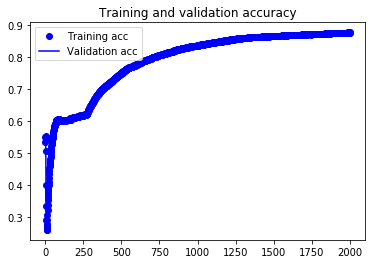

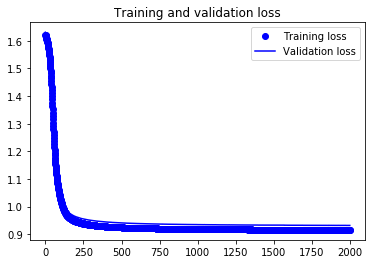

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [8]:
Xp = model.predict(X[-20:])
(Xp > 0.5).astype(int) == Y[-20:]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [9]:
X[-20:]

array([[0.61840834, 0.86341407],
       [0.15494294, 0.1841383 ],
       [0.20182673, 0.50630397],
       [0.07213736, 0.50305125],
       [0.91383753, 0.71906417],
       [0.18597285, 0.34451812],
       [0.8291162 , 0.433129  ],
       [0.79522746, 0.45426891],
       [0.80805517, 0.3113715 ],
       [0.03561528, 0.02424354],
       [0.10534969, 0.71992058],
       [0.77305932, 0.94939868],
       [0.29571047, 0.56725521],
       [0.97922777, 0.30127676],
       [0.15388802, 0.38957785],
       [0.17775771, 0.46540355],
       [0.34774891, 0.52433704],
       [0.25630399, 0.02285498],
       [0.61838134, 0.61101353],
       [0.23108386, 0.01126141]])

## Plot Decision Boundary

In [10]:
def plot_decision_boundary(model, label, steps=1000, index=0):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """   
    plt.title(label + " index: "+ str(index))
    axes = plt.gca()
    axes.set_xlim([0, 1])
    axes.set_ylim([0, 1])
    # Define region of interest by data limits
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1
    steps = 200
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])[:,index]

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)    
    plt.ylabel('x1')
    plt.xlabel('x0')
    plt.show()

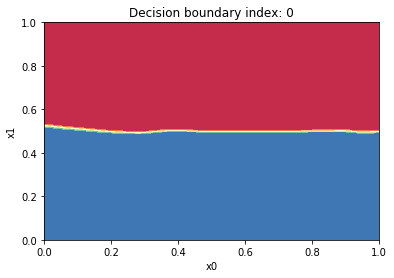

In [11]:
plot_decision_boundary(model, label="Decision boundary", index = 0)

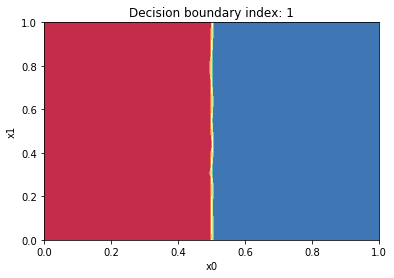

In [12]:
plot_decision_boundary(model, label="Decision boundary", index = 1)

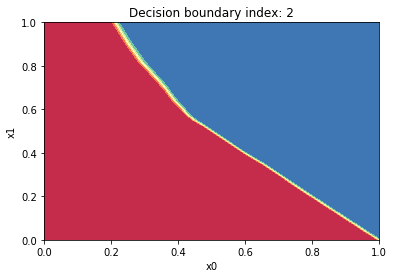

In [13]:
plot_decision_boundary(model, label="Decision boundary", index = 2)

In [14]:
x = np.array([[0.19, 1]])
model.predict(x) > 0.5

array([[False, False, False]])

# Compare with model without loss function mask

In [15]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# Compile model
# another_loss_function
model.compile(loss=another_loss_function, optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_dev,y_dev), 
                    epochs=2000, batch_size=5000)
model.evaluate(X[-3000:],Y[-3000:])

Train on 9700 samples, validate on 87300 samples
Epoch 1/2000
9700/9700 [==============================] - 0s 41us/step - loss: 1.6230 - acc: 0.5132 - val_loss: 1.6319 - val_acc: 0.3672
Epoch 2/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6205 - acc: 0.3496 - val_loss: 1.6292 - val_acc: 0.3207
Epoch 3/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6178 - acc: 0.3144 - val_loss: 1.6266 - val_acc: 0.3153
Epoch 4/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6152 - acc: 0.3184 - val_loss: 1.6241 - val_acc: 0.3397
Epoch 5/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6127 - acc: 0.3416 - val_loss: 1.6217 - val_acc: 0.3606
Epoch 6/2000
9700/9700 [==============================] - 0s 6us/step - loss: 1.6104 - acc: 0.3576 - val_loss: 1.6196 - val_acc: 0.3611
Epoch 7/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.6082 - acc: 0.3477 - val_loss: 1.6175 - val_acc: 0.303

9700/9700 [==============================] - 0s 7us/step - loss: 1.3880 - acc: 0.5421 - val_loss: 1.3956 - val_acc: 0.5363
Epoch 61/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.3795 - acc: 0.5410 - val_loss: 1.3871 - val_acc: 0.5355
Epoch 62/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.3708 - acc: 0.5405 - val_loss: 1.3786 - val_acc: 0.5345
Epoch 63/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.3621 - acc: 0.5385 - val_loss: 1.3700 - val_acc: 0.5351
Epoch 64/2000
9700/9700 [==============================] - 0s 6us/step - loss: 1.3533 - acc: 0.5401 - val_loss: 1.3613 - val_acc: 0.5364
Epoch 65/2000
9700/9700 [==============================] - 0s 6us/step - loss: 1.3445 - acc: 0.5412 - val_loss: 1.3525 - val_acc: 0.5368
Epoch 66/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.3355 - acc: 0.5414 - val_loss: 1.3436 - val_acc: 0.5378
Epoch 67/2000
9700/9700 [==============================

9700/9700 [==============================] - 0s 7us/step - loss: 1.0119 - acc: 0.5915 - val_loss: 1.0283 - val_acc: 0.5866
Epoch 120/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.0093 - acc: 0.5901 - val_loss: 1.0260 - val_acc: 0.5834
Epoch 121/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.0069 - acc: 0.5879 - val_loss: 1.0236 - val_acc: 0.5799
Epoch 122/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.0046 - acc: 0.5845 - val_loss: 1.0213 - val_acc: 0.5776
Epoch 123/2000
9700/9700 [==============================] - 0s 7us/step - loss: 1.0022 - acc: 0.5824 - val_loss: 1.0190 - val_acc: 0.5774
Epoch 124/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9999 - acc: 0.5830 - val_loss: 1.0168 - val_acc: 0.5791
Epoch 125/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.9976 - acc: 0.5822 - val_loss: 1.0146 - val_acc: 0.5764
Epoch 126/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.8901 - acc: 0.5821 - val_loss: 0.9090 - val_acc: 0.5686
Epoch 179/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8885 - acc: 0.5771 - val_loss: 0.9074 - val_acc: 0.5715
Epoch 180/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.8870 - acc: 0.5827 - val_loss: 0.9060 - val_acc: 0.5753
Epoch 181/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8855 - acc: 0.5841 - val_loss: 0.9046 - val_acc: 0.5731
Epoch 182/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8841 - acc: 0.5838 - val_loss: 0.9033 - val_acc: 0.5709
Epoch 183/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8826 - acc: 0.5773 - val_loss: 0.9018 - val_acc: 0.5621
Epoch 184/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8812 - acc: 0.5715 - val_loss: 0.9005 - val_acc: 0.5684
Epoch 185/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.8381 - acc: 0.5691 - val_loss: 0.8575 - val_acc: 0.5650
Epoch 238/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8376 - acc: 0.5736 - val_loss: 0.8570 - val_acc: 0.5670
Epoch 239/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8370 - acc: 0.5794 - val_loss: 0.8564 - val_acc: 0.5734
Epoch 240/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8366 - acc: 0.5773 - val_loss: 0.8559 - val_acc: 0.5622
Epoch 241/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8361 - acc: 0.5681 - val_loss: 0.8555 - val_acc: 0.5553
Epoch 242/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8355 - acc: 0.5653 - val_loss: 0.8548 - val_acc: 0.5604
Epoch 243/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.8352 - acc: 0.5719 - val_loss: 0.8543 - val_acc: 0.5672
Epoch 244/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.8125 - acc: 0.5795 - val_loss: 0.8323 - val_acc: 0.5744
Epoch 297/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.8121 - acc: 0.5846 - val_loss: 0.8320 - val_acc: 0.5762
Epoch 298/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8118 - acc: 0.5839 - val_loss: 0.8318 - val_acc: 0.5741
Epoch 299/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.8114 - acc: 0.5811 - val_loss: 0.8314 - val_acc: 0.5735
Epoch 300/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.8112 - acc: 0.5810 - val_loss: 0.8310 - val_acc: 0.5710
Epoch 301/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.8108 - acc: 0.5806 - val_loss: 0.8309 - val_acc: 0.5805
Epoch 302/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.8104 - acc: 0.5861 - val_loss: 0.8303 - val_acc: 0.5752
Epoch 303/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7957 - acc: 0.5884 - val_loss: 0.8163 - val_acc: 0.5945
Epoch 356/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7955 - acc: 0.5979 - val_loss: 0.8160 - val_acc: 0.5848
Epoch 357/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7953 - acc: 0.5819 - val_loss: 0.8159 - val_acc: 0.5706
Epoch 358/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7951 - acc: 0.5801 - val_loss: 0.8156 - val_acc: 0.5846
Epoch 359/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7948 - acc: 0.5889 - val_loss: 0.8154 - val_acc: 0.5814
Epoch 360/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.7947 - acc: 0.5793 - val_loss: 0.8152 - val_acc: 0.5715
Epoch 361/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7945 - acc: 0.5789 - val_loss: 0.8150 - val_acc: 0.5835
Epoch 362/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.7842 - acc: 0.5773 - val_loss: 0.8060 - val_acc: 0.5586
Epoch 415/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7841 - acc: 0.5644 - val_loss: 0.8057 - val_acc: 0.5521
Epoch 416/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7838 - acc: 0.5603 - val_loss: 0.8055 - val_acc: 0.5803
Epoch 417/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7839 - acc: 0.5980 - val_loss: 0.8054 - val_acc: 0.5886
Epoch 418/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7836 - acc: 0.5715 - val_loss: 0.8056 - val_acc: 0.5296
Epoch 419/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7835 - acc: 0.5414 - val_loss: 0.8051 - val_acc: 0.5787
Epoch 420/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7834 - acc: 0.6019 - val_loss: 0.8049 - val_acc: 0.5973
Epoch 421/2000
9700/9700 [=======================

Epoch 473/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7763 - acc: 0.5712 - val_loss: 0.7987 - val_acc: 0.5594
Epoch 474/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7762 - acc: 0.5795 - val_loss: 0.7986 - val_acc: 0.5759
Epoch 475/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7761 - acc: 0.5774 - val_loss: 0.7986 - val_acc: 0.5643
Epoch 476/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7760 - acc: 0.5833 - val_loss: 0.7985 - val_acc: 0.5869
Epoch 477/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7759 - acc: 0.5846 - val_loss: 0.7984 - val_acc: 0.5520
Epoch 478/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7758 - acc: 0.5663 - val_loss: 0.7982 - val_acc: 0.5751
Epoch 479/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7757 - acc: 0.5940 - val_loss: 0.7981 - val_acc: 0.5746
Epoch 480/2000
9700/9700 [========

9700/9700 [==============================] - 0s 7us/step - loss: 0.7717 - acc: 0.5695 - val_loss: 0.7943 - val_acc: 0.5923
Epoch 533/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7717 - acc: 0.6004 - val_loss: 0.7943 - val_acc: 0.5575
Epoch 534/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7716 - acc: 0.5472 - val_loss: 0.7943 - val_acc: 0.4947
Epoch 535/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7716 - acc: 0.5364 - val_loss: 0.7942 - val_acc: 0.6070
Epoch 536/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7716 - acc: 0.5961 - val_loss: 0.7942 - val_acc: 0.5547
Epoch 537/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7714 - acc: 0.5542 - val_loss: 0.7940 - val_acc: 0.5553
Epoch 538/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7713 - acc: 0.5641 - val_loss: 0.7939 - val_acc: 0.5691
Epoch 539/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.7686 - acc: 0.5578 - val_loss: 0.7912 - val_acc: 0.5913
Epoch 592/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7684 - acc: 0.5836 - val_loss: 0.7912 - val_acc: 0.5148
Epoch 593/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7684 - acc: 0.5227 - val_loss: 0.7911 - val_acc: 0.5858
Epoch 594/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7684 - acc: 0.5993 - val_loss: 0.7911 - val_acc: 0.5343
Epoch 595/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7684 - acc: 0.5162 - val_loss: 0.7911 - val_acc: 0.5552
Epoch 596/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7683 - acc: 0.5819 - val_loss: 0.7911 - val_acc: 0.5730
Epoch 597/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7682 - acc: 0.5481 - val_loss: 0.7910 - val_acc: 0.5070
Epoch 598/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7662 - acc: 0.5174 - val_loss: 0.7889 - val_acc: 0.5940
Epoch 651/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7662 - acc: 0.6043 - val_loss: 0.7888 - val_acc: 0.5164
Epoch 652/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7661 - acc: 0.4991 - val_loss: 0.7888 - val_acc: 0.4847
Epoch 653/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7660 - acc: 0.5413 - val_loss: 0.7889 - val_acc: 0.5875
Epoch 654/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7660 - acc: 0.5707 - val_loss: 0.7889 - val_acc: 0.4774
Epoch 655/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7660 - acc: 0.5328 - val_loss: 0.7887 - val_acc: 0.5919
Epoch 656/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7659 - acc: 0.5837 - val_loss: 0.7887 - val_acc: 0.5096
Epoch 657/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7641 - acc: 0.5902 - val_loss: 0.7870 - val_acc: 0.5561
Epoch 710/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7643 - acc: 0.5644 - val_loss: 0.7870 - val_acc: 0.5145
Epoch 711/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7640 - acc: 0.5012 - val_loss: 0.7869 - val_acc: 0.5319
Epoch 712/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7641 - acc: 0.5487 - val_loss: 0.7868 - val_acc: 0.5579
Epoch 713/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7640 - acc: 0.5289 - val_loss: 0.7870 - val_acc: 0.4872
Epoch 714/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7640 - acc: 0.5291 - val_loss: 0.7869 - val_acc: 0.5999
Epoch 715/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7640 - acc: 0.5974 - val_loss: 0.7869 - val_acc: 0.5434
Epoch 716/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7626 - acc: 0.5905 - val_loss: 0.7852 - val_acc: 0.4605
Epoch 769/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7625 - acc: 0.4702 - val_loss: 0.7852 - val_acc: 0.5821
Epoch 770/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7624 - acc: 0.5986 - val_loss: 0.7852 - val_acc: 0.5157
Epoch 771/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7626 - acc: 0.4955 - val_loss: 0.7852 - val_acc: 0.5791
Epoch 772/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7624 - acc: 0.5933 - val_loss: 0.7852 - val_acc: 0.4938
Epoch 773/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7624 - acc: 0.4852 - val_loss: 0.7851 - val_acc: 0.5270
Epoch 774/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7623 - acc: 0.5613 - val_loss: 0.7851 - val_acc: 0.5440
Epoch 775/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.7613 - acc: 0.5270 - val_loss: 0.7840 - val_acc: 0.4909
Epoch 828/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7612 - acc: 0.5170 - val_loss: 0.7839 - val_acc: 0.5713
Epoch 829/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7614 - acc: 0.5586 - val_loss: 0.7839 - val_acc: 0.5683
Epoch 830/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7613 - acc: 0.5672 - val_loss: 0.7839 - val_acc: 0.5051
Epoch 831/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7612 - acc: 0.5102 - val_loss: 0.7839 - val_acc: 0.5454
Epoch 832/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7612 - acc: 0.5378 - val_loss: 0.7839 - val_acc: 0.5036
Epoch 833/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7613 - acc: 0.5121 - val_loss: 0.7838 - val_acc: 0.5310
Epoch 834/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 6us/step - loss: 0.7603 - acc: 0.4777 - val_loss: 0.7829 - val_acc: 0.6081
Epoch 887/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7605 - acc: 0.6041 - val_loss: 0.7829 - val_acc: 0.4926
Epoch 888/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7604 - acc: 0.4860 - val_loss: 0.7829 - val_acc: 0.5137
Epoch 889/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7605 - acc: 0.5830 - val_loss: 0.7829 - val_acc: 0.5426
Epoch 890/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7604 - acc: 0.5364 - val_loss: 0.7831 - val_acc: 0.5304
Epoch 891/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7604 - acc: 0.5456 - val_loss: 0.7828 - val_acc: 0.5017
Epoch 892/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7603 - acc: 0.5488 - val_loss: 0.7828 - val_acc: 0.6163
Epoch 893/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7594 - acc: 0.5154 - val_loss: 0.7819 - val_acc: 0.6075
Epoch 946/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7595 - acc: 0.5956 - val_loss: 0.7818 - val_acc: 0.4925
Epoch 947/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7596 - acc: 0.5093 - val_loss: 0.7818 - val_acc: 0.5312
Epoch 948/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7593 - acc: 0.5548 - val_loss: 0.7820 - val_acc: 0.6047
Epoch 949/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7596 - acc: 0.5976 - val_loss: 0.7818 - val_acc: 0.5617
Epoch 950/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7594 - acc: 0.5237 - val_loss: 0.7818 - val_acc: 0.4637
Epoch 951/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7594 - acc: 0.5054 - val_loss: 0.7818 - val_acc: 0.6049
Epoch 952/2000
9700/9700 [=======================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7588 - acc: 0.5370 - val_loss: 0.7809 - val_acc: 0.5568
Epoch 1005/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7587 - acc: 0.5578 - val_loss: 0.7810 - val_acc: 0.4948
Epoch 1006/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7587 - acc: 0.4996 - val_loss: 0.7809 - val_acc: 0.5769
Epoch 1007/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7587 - acc: 0.5931 - val_loss: 0.7809 - val_acc: 0.4916
Epoch 1008/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7587 - acc: 0.4928 - val_loss: 0.7809 - val_acc: 0.5574
Epoch 1009/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7587 - acc: 0.5607 - val_loss: 0.7808 - val_acc: 0.5538
Epoch 1010/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7587 - acc: 0.5486 - val_loss: 0.7808 - val_acc: 0.5437
Epoch 1011/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7581 - acc: 0.5866 - val_loss: 0.7801 - val_acc: 0.4826
Epoch 1064/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7581 - acc: 0.4903 - val_loss: 0.7801 - val_acc: 0.5769
Epoch 1065/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7581 - acc: 0.5832 - val_loss: 0.7801 - val_acc: 0.4984
Epoch 1066/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7580 - acc: 0.5016 - val_loss: 0.7801 - val_acc: 0.5549
Epoch 1067/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7580 - acc: 0.5577 - val_loss: 0.7801 - val_acc: 0.5429
Epoch 1068/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7580 - acc: 0.5496 - val_loss: 0.7801 - val_acc: 0.5448
Epoch 1069/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7580 - acc: 0.5384 - val_loss: 0.7800 - val_acc: 0.5273
Epoch 1070/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7574 - acc: 0.5329 - val_loss: 0.7794 - val_acc: 0.5711
Epoch 1123/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.7574 - acc: 0.5579 - val_loss: 0.7795 - val_acc: 0.5223
Epoch 1124/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7574 - acc: 0.5171 - val_loss: 0.7794 - val_acc: 0.5853
Epoch 1125/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7574 - acc: 0.5789 - val_loss: 0.7794 - val_acc: 0.5162
Epoch 1126/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7574 - acc: 0.5121 - val_loss: 0.7794 - val_acc: 0.5575
Epoch 1127/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7575 - acc: 0.5586 - val_loss: 0.7793 - val_acc: 0.5105
Epoch 1128/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7574 - acc: 0.5157 - val_loss: 0.7794 - val_acc: 0.5697
Epoch 1129/2000
9700/9700 [================

Epoch 1181/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7569 - acc: 0.5277 - val_loss: 0.7787 - val_acc: 0.5216
Epoch 1182/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7569 - acc: 0.5440 - val_loss: 0.7789 - val_acc: 0.5949
Epoch 1183/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7569 - acc: 0.5876 - val_loss: 0.7788 - val_acc: 0.4668
Epoch 1184/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7568 - acc: 0.5153 - val_loss: 0.7787 - val_acc: 0.5754
Epoch 1185/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7568 - acc: 0.5396 - val_loss: 0.7787 - val_acc: 0.5038
Epoch 1186/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7569 - acc: 0.5377 - val_loss: 0.7787 - val_acc: 0.5072
Epoch 1187/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7567 - acc: 0.5140 - val_loss: 0.7788 - val_acc: 0.6012
Epoch 1188/2000
9700/9700 [

Epoch 1240/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7563 - acc: 0.4855 - val_loss: 0.7782 - val_acc: 0.6018
Epoch 1241/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7564 - acc: 0.6114 - val_loss: 0.7781 - val_acc: 0.4845
Epoch 1242/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7562 - acc: 0.4890 - val_loss: 0.7781 - val_acc: 0.5790
Epoch 1243/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7563 - acc: 0.5798 - val_loss: 0.7782 - val_acc: 0.4428
Epoch 1244/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7565 - acc: 0.5078 - val_loss: 0.7782 - val_acc: 0.6305
Epoch 1245/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7563 - acc: 0.6049 - val_loss: 0.7784 - val_acc: 0.3999
Epoch 1246/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7564 - acc: 0.4477 - val_loss: 0.7782 - val_acc: 0.6514
Epoch 1247/2000
9700/9700 [

Epoch 1299/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7557 - acc: 0.4872 - val_loss: 0.7776 - val_acc: 0.5913
Epoch 1300/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7558 - acc: 0.5910 - val_loss: 0.7776 - val_acc: 0.4919
Epoch 1301/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7557 - acc: 0.5085 - val_loss: 0.7775 - val_acc: 0.5987
Epoch 1302/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7557 - acc: 0.5892 - val_loss: 0.7775 - val_acc: 0.4659
Epoch 1303/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7557 - acc: 0.4884 - val_loss: 0.7775 - val_acc: 0.5479
Epoch 1304/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7557 - acc: 0.5349 - val_loss: 0.7775 - val_acc: 0.5387
Epoch 1305/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7556 - acc: 0.5512 - val_loss: 0.7774 - val_acc: 0.5482
Epoch 1306/2000
9700/9700 [

Epoch 1358/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7553 - acc: 0.4925 - val_loss: 0.7770 - val_acc: 0.6008
Epoch 1359/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7553 - acc: 0.5902 - val_loss: 0.7770 - val_acc: 0.5224
Epoch 1360/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7553 - acc: 0.5382 - val_loss: 0.7770 - val_acc: 0.5804
Epoch 1361/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7553 - acc: 0.5670 - val_loss: 0.7770 - val_acc: 0.4693
Epoch 1362/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7552 - acc: 0.5027 - val_loss: 0.7771 - val_acc: 0.5705
Epoch 1363/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7553 - acc: 0.5477 - val_loss: 0.7772 - val_acc: 0.5146
Epoch 1364/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7554 - acc: 0.5519 - val_loss: 0.7770 - val_acc: 0.5581
Epoch 1365/2000
9700/9700 [

9700/9700 [==============================] - 0s 7us/step - loss: 0.7548 - acc: 0.5569 - val_loss: 0.7766 - val_acc: 0.4864
Epoch 1417/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7548 - acc: 0.5125 - val_loss: 0.7765 - val_acc: 0.5603
Epoch 1418/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.7548 - acc: 0.5458 - val_loss: 0.7765 - val_acc: 0.5756
Epoch 1419/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7548 - acc: 0.5715 - val_loss: 0.7765 - val_acc: 0.5084
Epoch 1420/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7547 - acc: 0.5363 - val_loss: 0.7766 - val_acc: 0.5284
Epoch 1421/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7548 - acc: 0.5413 - val_loss: 0.7765 - val_acc: 0.5509
Epoch 1422/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7548 - acc: 0.5514 - val_loss: 0.7765 - val_acc: 0.5414
Epoch 1423/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7545 - acc: 0.4902 - val_loss: 0.7762 - val_acc: 0.5837
Epoch 1476/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7544 - acc: 0.5904 - val_loss: 0.7762 - val_acc: 0.4677
Epoch 1477/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7546 - acc: 0.5086 - val_loss: 0.7762 - val_acc: 0.5790
Epoch 1478/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7545 - acc: 0.5667 - val_loss: 0.7762 - val_acc: 0.4718
Epoch 1479/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7545 - acc: 0.5290 - val_loss: 0.7762 - val_acc: 0.6020
Epoch 1480/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7545 - acc: 0.5869 - val_loss: 0.7762 - val_acc: 0.4453
Epoch 1481/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7544 - acc: 0.5009 - val_loss: 0.7761 - val_acc: 0.6031
Epoch 1482/2000
9700/9700 [================

9700/9700 [==============================] - 0s 6us/step - loss: 0.7542 - acc: 0.5648 - val_loss: 0.7758 - val_acc: 0.5403
Epoch 1535/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7543 - acc: 0.5520 - val_loss: 0.7759 - val_acc: 0.4905
Epoch 1536/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7542 - acc: 0.5377 - val_loss: 0.7760 - val_acc: 0.6309
Epoch 1537/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7541 - acc: 0.5941 - val_loss: 0.7758 - val_acc: 0.4798
Epoch 1538/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7542 - acc: 0.5128 - val_loss: 0.7758 - val_acc: 0.5141
Epoch 1539/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7542 - acc: 0.5486 - val_loss: 0.7758 - val_acc: 0.5580
Epoch 1540/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7541 - acc: 0.5651 - val_loss: 0.7759 - val_acc: 0.5507
Epoch 1541/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7538 - acc: 0.5112 - val_loss: 0.7755 - val_acc: 0.5682
Epoch 1594/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7539 - acc: 0.5864 - val_loss: 0.7755 - val_acc: 0.4890
Epoch 1595/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7538 - acc: 0.4848 - val_loss: 0.7755 - val_acc: 0.5602
Epoch 1596/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7538 - acc: 0.5757 - val_loss: 0.7756 - val_acc: 0.5211
Epoch 1597/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7538 - acc: 0.5391 - val_loss: 0.7755 - val_acc: 0.5484
Epoch 1598/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7538 - acc: 0.5613 - val_loss: 0.7755 - val_acc: 0.5552
Epoch 1599/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7538 - acc: 0.5622 - val_loss: 0.7755 - val_acc: 0.5132
Epoch 1600/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7537 - acc: 0.5401 - val_loss: 0.7754 - val_acc: 0.5397
Epoch 1653/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7536 - acc: 0.5174 - val_loss: 0.7752 - val_acc: 0.5275
Epoch 1654/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7536 - acc: 0.5656 - val_loss: 0.7753 - val_acc: 0.5691
Epoch 1655/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7536 - acc: 0.5403 - val_loss: 0.7752 - val_acc: 0.5774
Epoch 1656/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7536 - acc: 0.5912 - val_loss: 0.7753 - val_acc: 0.4632
Epoch 1657/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7536 - acc: 0.4746 - val_loss: 0.7752 - val_acc: 0.5773
Epoch 1658/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7537 - acc: 0.5900 - val_loss: 0.7753 - val_acc: 0.5003
Epoch 1659/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7534 - acc: 0.5442 - val_loss: 0.7751 - val_acc: 0.5136
Epoch 1712/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7535 - acc: 0.5391 - val_loss: 0.7750 - val_acc: 0.5587
Epoch 1713/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7535 - acc: 0.5642 - val_loss: 0.7752 - val_acc: 0.5400
Epoch 1714/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7535 - acc: 0.5633 - val_loss: 0.7751 - val_acc: 0.4863
Epoch 1715/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7535 - acc: 0.5161 - val_loss: 0.7751 - val_acc: 0.6031
Epoch 1716/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7534 - acc: 0.5973 - val_loss: 0.7752 - val_acc: 0.4671
Epoch 1717/2000
9700/9700 [==============================] - 0s 8us/step - loss: 0.7534 - acc: 0.4897 - val_loss: 0.7751 - val_acc: 0.6227
Epoch 1718/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7532 - acc: 0.5412 - val_loss: 0.7748 - val_acc: 0.5273
Epoch 1771/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7532 - acc: 0.5506 - val_loss: 0.7749 - val_acc: 0.5770
Epoch 1772/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7532 - acc: 0.5768 - val_loss: 0.7749 - val_acc: 0.4793
Epoch 1773/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7532 - acc: 0.4949 - val_loss: 0.7749 - val_acc: 0.6187
Epoch 1774/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7532 - acc: 0.6121 - val_loss: 0.7749 - val_acc: 0.4799
Epoch 1775/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7532 - acc: 0.4949 - val_loss: 0.7749 - val_acc: 0.5673
Epoch 1776/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7533 - acc: 0.5894 - val_loss: 0.7749 - val_acc: 0.5517
Epoch 1777/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7530 - acc: 0.5100 - val_loss: 0.7746 - val_acc: 0.5690
Epoch 1830/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7530 - acc: 0.5709 - val_loss: 0.7747 - val_acc: 0.5071
Epoch 1831/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7530 - acc: 0.5161 - val_loss: 0.7746 - val_acc: 0.5422
Epoch 1832/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7530 - acc: 0.5661 - val_loss: 0.7746 - val_acc: 0.5412
Epoch 1833/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7529 - acc: 0.5653 - val_loss: 0.7747 - val_acc: 0.5166
Epoch 1834/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7530 - acc: 0.5375 - val_loss: 0.7746 - val_acc: 0.4979
Epoch 1835/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7530 - acc: 0.5223 - val_loss: 0.7746 - val_acc: 0.5903
Epoch 1836/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7529 - acc: 0.5508 - val_loss: 0.7744 - val_acc: 0.5013
Epoch 1889/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7528 - acc: 0.5487 - val_loss: 0.7745 - val_acc: 0.5489
Epoch 1890/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7528 - acc: 0.5326 - val_loss: 0.7744 - val_acc: 0.5234
Epoch 1891/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7529 - acc: 0.5493 - val_loss: 0.7744 - val_acc: 0.5324
Epoch 1892/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7528 - acc: 0.5638 - val_loss: 0.7745 - val_acc: 0.5747
Epoch 1893/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7528 - acc: 0.5786 - val_loss: 0.7744 - val_acc: 0.4946
Epoch 1894/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7528 - acc: 0.5037 - val_loss: 0.7744 - val_acc: 0.5489
Epoch 1895/2000
9700/9700 [================

9700/9700 [==============================] - 0s 7us/step - loss: 0.7527 - acc: 0.5390 - val_loss: 0.7743 - val_acc: 0.5820
Epoch 1948/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7527 - acc: 0.5922 - val_loss: 0.7742 - val_acc: 0.5244
Epoch 1949/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7527 - acc: 0.5169 - val_loss: 0.7742 - val_acc: 0.5728
Epoch 1950/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7526 - acc: 0.5851 - val_loss: 0.7743 - val_acc: 0.4681
Epoch 1951/2000
9700/9700 [==============================] - 0s 6us/step - loss: 0.7527 - acc: 0.4923 - val_loss: 0.7742 - val_acc: 0.5738
Epoch 1952/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7527 - acc: 0.5764 - val_loss: 0.7742 - val_acc: 0.4880
Epoch 1953/2000
9700/9700 [==============================] - 0s 7us/step - loss: 0.7526 - acc: 0.5464 - val_loss: 0.7744 - val_acc: 0.5997
Epoch 1954/2000
9700/9700 [================

[0.909196899731954, 0.5273333332538604]

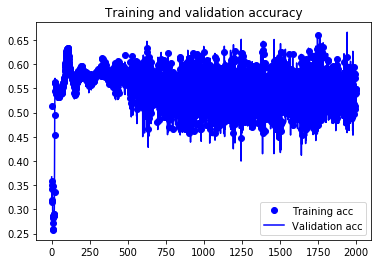

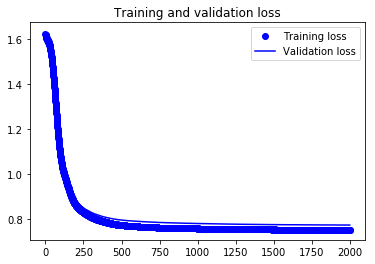

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
